# Lung adenocarcinoma dataset analysis - Task 1 to 5



## Task 1 - Description and characterisation of the data

The data herein described is relative to patients with adenocarcinoma of the lung. This type of cancer is the leading cause of death worldwide. For the 230 patients with sigificant differences in gene mutation, aberrations in the genes NF1, MET, ERBB2 and RIT1 are present in 13% of the cases. Also, EGFR mutations were more abundant in female patients, whereas mutations in RBM10 were more frequent in males. Moreover, these genes were enriched in samples lacking an activated oncogene, suggesting a driver role for these events in certain tumours [1].

The "data" dataset contains expression data from the 515 patients involved in the study whereas the "meta_patients" dataset is in regard to several nominal and numeric atributes of each patient.




## Task 2 - Preprocessing of data

In [1]:
# importing the datasets of expression data and metadata
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)
meta_patients = pd.read_csv("luad_tcga_clinical_data.tsv",sep="\t",header=0,index_col=2)

# verifying the number of columns and lines of both datasets
meta_patients=meta_patients.drop("Study ID",axis=1) # removing the column "Study ID" of the metadata
print(data.shape)
print(meta_patients.shape)

(20531, 518)
(517, 106)


In [2]:
# sum of the nas in both datasets
print(data.isnull().sum().sum())
print(meta_patients.isnull().sum().sum())


2
25514


In [3]:
# verify if there are genes (lines) with no expression data 
sel_index=data.apply(lambda x: (x==0).all(), axis = 0)
sel_index.index[sel_index]

                 Hugo_Symbol  TCGA-05-4244-01  TCGA-05-4249-01  \
Entrez_Gene_Id                                                   
100130426       LOC100130426           0.0000           0.0000   
100133144           UBE2Q2P3          10.0113           7.1957   
100134869           UBE2Q2P3          11.2820          12.4436   
10357              LOC149767          49.5994          90.5117   
10431                 TIMM23         848.9397         924.0158   
...                      ...              ...              ...   
7791                     ZYX        2837.9440        2351.2500   
23140               FLJ10821         871.2802        1138.1170   
26009                   ZZZ3         575.2683         690.2752   
387590             HUMRTVLH3           6.6323         179.9738   
389932               AKR1C6P           0.0000           0.0000   

                TCGA-05-4250-01  TCGA-05-4382-01  TCGA-05-4384-01  \
Entrez_Gene_Id                                                      
100

Index([], dtype='object')

In [9]:
# switch the entrez gene id into the Hugo symbol 
id_converter = {}

for key in data.index:
    id_converter[data.loc[key, "Hugo_Symbol"]]=key


# scaling of the expression data    
data_scaled = preprocessing.scale(data.iloc[:,1:])

data_scaled = pd.DataFrame(data_scaled, index =data.index , columns = data.columns[1:])
print(data_scaled.shape)
data_scaled.describe()



(20531, 517)


,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
count,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,...,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04,2.053100e+04
mean,-3.115773e-16,-1.279371e-16,-1.180710e-16,1.760426e-16,1.639365e-16,-5.013876e-17,-1.044819e-16,-5.187187e-18,2.994468e-16,-9.816857e-17,...,-5.840000e-16,-1.414641e-16,3.188910e-16,-1.227702e-16,-4.443650e-17,4.291036e-16,-8.778067e-17,2.858563e-17,-1.056851e-16,1.914812e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.379758e-01,-2.842081e-01,-2.626203e-01,-2.374016e-01,-2.168511e-01,-2.403818e-01,-2.170053e-01,-2.190499e-01,-1.699081e-01,-3.270922e-01,...,-1.642516e-01,-2.230331e-01,-2.491517e-01,-1.646211e-01,-3.036185e-01,-1.810726e-01,-2.682129e-01,-1.131176e-01,-1.543711e-01,-1.410340e-01
25%,-2.362731e-01,-2.821306e-01,-2.611826e-01,-2.352066e-01,-2.151068e-01,-2.388122e-01,-2.161395e-01,-2.184867e-01,-1.689584e-01,-3.247188e-01,...,-1.632408e-01,-2.215395e-01,-2.475431e-01,-1.631929e-01,-2.990303e-01,-1.798631e-01,-2.636506e-01,-1.126076e-01,-1.533358e-01,-1.395579e-01
50%,-1.869794e-01,-2.222808e-01,-2.078085e-01,-1.808513e-01,-1.668470e-01,-1.877570e-01,-1.747213e-01,-1.897625e-01,-1.376212e-01,-2.500801e-01,...,-1.320914e-01,-1.759019e-01,-1.948448e-01,-1.271216e-01,-2.086346e-01,-1.419273e-01,-1.970830e-01,-9.333137e-02,-1.241266e-01,-1.070846e-01
75%,-3.194700e-02,-2.393561e-02,-3.748754e-02,-2.688335e-02,-1.683461e-02,-2.903397e-02,-3.358210e-02,-6.470214e-02,-2.610938e-02,-3.993109e-03,...,-3.097049e-02,-2.123178e-02,-3.330729e-02,-1.620096e-02,1.097588e-02,-2.443665e-02,-1.227663e-02,-2.203986e-02,-2.549846e-02,-2.101192e-02
max,6.888929e+01,4.859775e+01,4.731961e+01,5.039623e+01,9.873500e+01,8.431307e+01,6.340503e+01,7.342163e+01,8.200304e+01,3.874696e+01,...,8.471857e+01,9.757246e+01,5.011805e+01,1.165459e+02,5.436600e+01,8.561694e+01,6.685034e+01,1.094149e+02,1.104419e+02,1.093210e+02


In [40]:
# types of data for each column
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
meta_patients.dtypes


Patient ID                                                                                      object
Diagnosis Age                                                                                  float64
Neoplasm Disease Stage American Joint Committee on Cancer Code                                 float64
Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage                float64
American Joint Committee on Cancer Metastasis Stage Code                                        object
American Joint Committee on Cancer Lymph Node Stage Code                                       float64
American Joint Committee on Cancer Lymph Node Stage Code.1                                     float64
Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code                       object
Neoplasm Disease Stage American Joint Committee on Cancer Code.1                                object
American Joint Committee on Cancer Publication Version Type              

Sex
Female    277
Male      240
dtype: int64


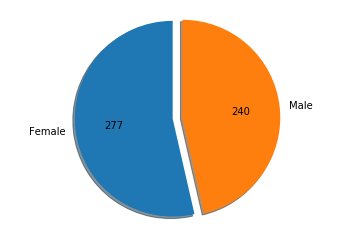

In [11]:
# pie chart of data from patients genre
import matplotlib.pyplot as plt
meta_patients.loc[:,"Sex"]=meta_patients.loc[:,"Sex"].map({'MALE':'Male','Male':'Male','Female':'Female'})
values_sex=meta_patients.groupby("Sex").size()
print(values_sex)
fracs = [277, 240]
total = sum(fracs)
plt.pie(values_sex, labels = values_sex.index,
        autopct= lambda p: '{:.0f}'.format(p * total / 100),
        shadow=True, startangle=90, explode = (0, 0.1))
plt.axis('equal')
plt.show()

American Joint Committee on Cancer Metastasis Stage Code
M0     347
M1      18
M1a      2
M1b      5
MX     141
nan      4
dtype: int64


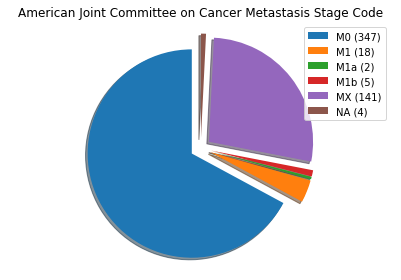

In [12]:
# pie chart englobing the different stage codes for cancer metastasis

values_metastasis=meta_patients.astype(str).groupby("American Joint Committee on Cancer Metastasis Stage Code").size()
# nas = meta_patients.loc[:,"American Joint Committee on Cancer Metastasis Stage Code"].isnull().sum()
# values_metastasis.append(nas)
print(values_metastasis)
patches, text= plt.pie(values_metastasis,
        shadow=True, startangle=90, explode = (0.1,0.1,0.1,0.1,0.1,0.1))
labels= ["M0 (347)","M1 (18)","M1a (2)","M1b (5)", "MX (141)", "NA (4)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Metastasis Stage Code')
plt.tight_layout()
plt.show()

American Joint Committee on Cancer Publication Version Type
3rd      3
4th      5
5th     30
6th    188
7th    268
nan     23
dtype: int64


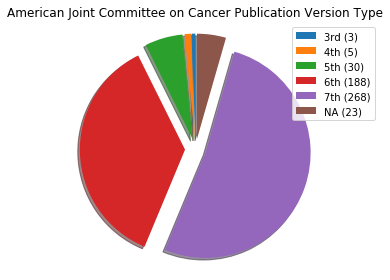

In [15]:
# pie chart from patient's cancer publication version type

print(meta_patients.astype(str).groupby("American Joint Committee on Cancer Publication Version Type").size())
values_ajcc_staging=meta_patients.astype(str).groupby("American Joint Committee on Cancer Publication Version Type").size()
fracs = [3,5,30,188,268,23]
total = sum(fracs)
patches, text= plt.pie(values_ajcc_staging, shadow=True, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1,0.1,))
labels= ["3rd (3)","4th (5)","5th (30)","6th (188)", "7th (268)", "NA (23)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('American Joint Committee on Cancer Publication Version Type')
plt.tight_layout()
plt.show()

Patient Smoking History Category
1.0     76
2.0    119
3.0    135
4.0    169
5.0      4
nan     14
dtype: int64


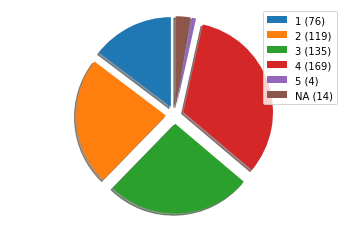

In [28]:
# pie chart for patient smoking history category 

values_smoking_hist=meta_patients.astype(str).groupby("Patient Smoking History Category").size()
print(values_smoking_hist)
patches, text = plt.pie(values_smoking_hist, shadow=True, startangle=90, explode=(0.1,0.1,0.1,0.1,0.1,0.1,))
labels=["1 (76)","2 (119)","3 (135)","4 (169)","5 (4)","NA (14)"]
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()

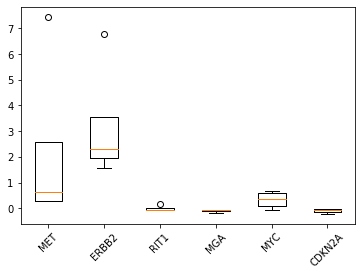

In [44]:
# box plot for the differently expressed genes, reported in the article, of the 5th Patient Smoking History Category 

genes_entrez_id = []
genes = ["MET","ERBB2","RIT1","MGA","MYC","CDKN2A"]
for gene in genes: #entrez gene id for the genes in the list
    genes_entrez_id.append(id_converter[gene]) 

patient= meta_patients[meta_patients.loc[:,"Patient Smoking History Category"]==5].index   # patients with Patient Smoking History Category == 5  
data_scaled.loc[genes_entrez_id,patient]
plt.boxplot(data_scaled.loc[genes_entrez_id,patient])
plt.xticks(range(1,7),genes, rotation=45 )
plt.show()

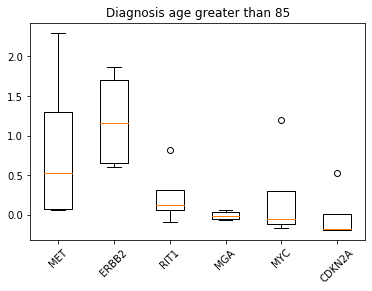

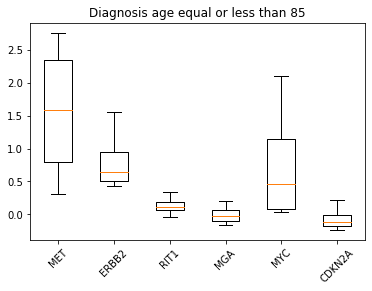

In [56]:
#boxplot for the differently expressed genes, reported in the article, for the patients with Diagnosis age greater than 85

patient= meta_patients[meta_patients.loc[:,"Diagnosis Age"]>85].index    
plt.boxplot(data_scaled.loc[genes_entrez_id,patient])
plt.xticks(range(1,7),genes, rotation=45 )
plt.title("Diagnosis age greater than 85")
plt.show()

#boxplot for the differently expressed genes, reported in the article, for the patients with Diagnosis age equal or less than 85
patient= meta_patients[meta_patients.loc[:,"Diagnosis Age"]<=40].index
plt.boxplot(data_scaled.loc[genes_entrez_id,patient])
plt.xticks(range(1,7),genes, rotation=45 )
plt.title("Diagnosis age equal or less than 85")
plt.show()

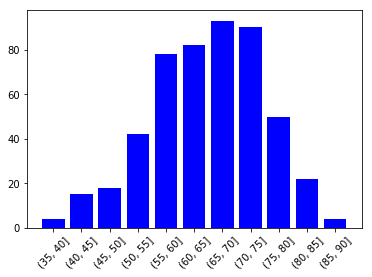

In [18]:
# barplot of the diagnosis age of the patients


df = meta_patients.groupby('Diagnosis Age').size()
bins = pd.cut(meta_patients.loc[:,'Diagnosis Age'], np.arange(35,91,5)) #division of the diagnosis age into groups of 5
df=meta_patients.groupby(bins)['Diagnosis Age'].agg(['count']) # sum of the frequency of each group 

nas = meta_patients.loc[:,'Diagnosis Age'].isnull().sum()
indexes = [str(c) for c in df.index] 
values = [v[0] for v in df.values]


plt.bar(indexes ,values ,color='b')
plt.xticks(indexes, rotation='45')
plt.show()

In [11]:
#sum of the null values of the scaled expression data
data_scaled.isnull().sum().sum()

0

In [12]:
#the followig code verifies whether there is repeated patients identifiers or not
patients_list = data_scaled.columns.tolist()
res = []
seen = []
for patient in patients_list:
    if patient in seen:
        res.append(patient)
    else:
        seen.append(patient)
print(res)




[]


In [13]:
#number of columns and lines of the metadata dataset
print(meta_patients.shape)

(517, 106)


In [50]:
#the following code verifies wether there are columns filled with only null values 
sel_index=meta_patients.apply(lambda x: (x.isnull()).all(), axis = 0)
labels_with_data = sel_index[sel_index==False].index.tolist()
print(len(labels_with_data))

#subset of the metadate without the columns with no values
meta_patients = meta_patients.loc[:,labels_with_data]
print(meta_patients.shape)
print(data_scaled.shape)


80
(517, 80)
(20531, 517)


In [15]:
meta_patients

,Patient ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,ALK Analysis Type,ALK Translocation Status,Cancer Type,Cancer Type Detailed,Carbon monoxide diffusion dlco,Days to Sample Collection.,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Disease Free (Months),Disease Free Status,Disease code,Performance Status,Ethnicity Category,Fev1 fvc ratio postbroncholiator,Fev1 fvc ratio prebroncholiator,Fev1 percent ref postbroncholiator,Fev1 percent ref prebroncholiator,Form completion date,Fraction Genome Altered,Neoplasm Histologic Type Name,Neoadjuvant Therapy Type Administered Prior To Resection Text,Prior Cancer Diagnosis Occurence,ICD-10 Classification,"International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code","International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code",Informed consent verified,Year Cancer Initial Diagnosis,Is FFPE,Karnofsky Performance Score,Kras gene analysis indicator,KRAS Mutation,Kras mutation identified type,Location lung parenchyma,Longest Dimension,Mutation Count,Mutation Status,Mutation Type,New Neoplasm Event Post Initial Therapy Indicator,Oct embedded,Oncotree Code,Overall Survival (Months),Overall Survival Status,Other Patient ID,Other Sample ID,Pathology Report File Name,Pathology report uuid,Performance Status Assessment Timepoint Category,Primary Other Site of Disease Name,Patient Primary Tumor Site,Project code,Tissue Prospective Collection Indicator,Pulmonary function test indicator,Race Category,Did patient start adjuvant postoperative radiotherapy?,Surgical Margin Resection Status,Tissue Retrospective Collection Indicator,Number of Samples Per Patient,Sample Initial Weight,Sample Type,Sample type id,Sex,Shortest Dimension,Person Cigarette Smoking History Pack Year Value,Started Smoking Year,Stopped Smoking Year,Specimen Second Longest Dimension,Adjuvant Postoperative Targeted Therapy Administered Indicator,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,TCGA-05-4244,70.0,M1,N2,Stage IV,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0,0.00,DiseaseFree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/22/10,0.4565,Lung Adenocarcinoma,No,No,C34.3,8140/3,C34.3,YES,2009.0,NO,NaN,NaN,NaN,NaN,Peripheral Lung,1.1,NaN,NaN,NaN,NaN,NaN,LUAD,0.00,LIVING,34040b83-7e8a-4264-a551-b16621843e28,bac0b02d-ac3b-4784-b8bf-180eadd548a3,TCGA-05-4244.3a844132-f813-4d8e-8f7d-dbae0b23d...,3a844132-f813-4d8e-8f7d-dbae0b23d7fd,NaN,NaN,R-Lower,NaN,NO,NaN,NaN,NaN,RX,YES,1,NaN,Primary,1,Male,0.3,38.0,NaN,NaN,0.9,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4249-01,TCGA-05-4249,67.0,M0,N0,Stage IB,6th,T2,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0,50.03,DiseaseFree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/22/10,0.2221,Lung Adenocarcinoma,No,No,C34.3,8140/3,C34.3,YES,2007.0,NO,NaN,NaN,NaN,NaN,Peripheral Lung,1.4,288.0,NaN,NaN,NaN,NaN,LUAD,50.03,LIVING,4addf05f-3668-4b3f-a17f-c0227329ca52,80f196fe-1eaf-40cb-ab58-c84795acc5c7,TCGA-05-4249.7e920317-d5c2-4160-9e2b-ef0101eb5...,7e920317-d5c2-4160-9e2b-ef0101eb5a23,NaN,NaN,R-Lower,NaN,NO,NaN,NaN,NaN,R0,YES,1,NaN,Primary,1,Male,0.4,52.0,NaN,NaN,0.8,NaN,5,3.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4250-01,TCGA-05-4250,79.0,M0,N1,Stage IIIA,6th,T3,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/22/10,0.2362,Lung Adenocarcinoma,No,No,C34.3,8140/3,C34.3,YES,2007.0,NO,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,LUAD,3.98,DECEASED,f98ecd8a-b878-4f53-

In [19]:

quantity_na = meta_patients.apply(lambda x: (x.isnull()).sum(), axis = 0)
print(str(quantity_na[quantity_na!=0].index.size) + " labels with more than one NA") #columns with at least one na
print(str(quantity_na[quantity_na!=0].sum()) + " NAs") #total count of nas in the dataset


Patient ID                                                                           0
Diagnosis Age                                                                       19
Neoplasm Disease Stage American Joint Committee on Cancer Code                     517
Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage    517
American Joint Committee on Cancer Metastasis Stage Code                             4
                                                                                  ... 
Primary Therapy Outcome Success Type                                               368
Tumor Site                                                                           0
Person Neoplasm Status                                                              98
Vial number                                                                          2
Patient's Vital Status                                                               0
Length: 106, dtype: int64
85 labels with mo

## Task 3 - Statistical analysis

In [64]:
# transposition of the scaled dataset of expression data
data_scaled = data_scaled.transpose()

0


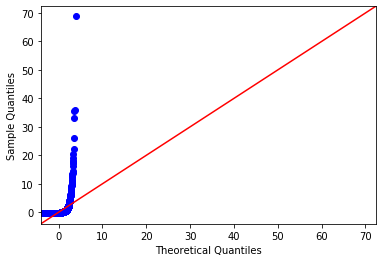

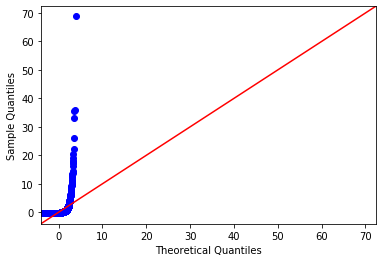

In [65]:
# the following code verifies the normality of the data

from scipy import stats
p_values=[]
for sample in data_scaled.index.tolist():
    w, p_value = stats.shapiro(np.random.choice(data_scaled.loc[sample],500))
    p_values.append(p_value)

counter = 0
for p_value in p_values:
    if p_value>=0.05:
        counter+=1

print(counter)

#qqplot of the data showing the if the data follow a normal distribution
test = data_scaled.iloc[0]
sm.qqplot(test,line='45')



Since we have no genes with a p-value greater than 0.05, the null hypothesis cannot be rejected. Thus, it can be concluded that there is no statistically signicative data proving that is normally distributed. This can be further confirmed by the plot, which shows that the data does not follow a normal distribution.


### Differential expression analysis regarding "Patient's Vital Status"

In [66]:
# statistical analysis to verify statistical differences between the different status of the patient's vital status column

patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient's Vital Status",meta_patients.loc[:,"Patient's Vital Status"]) #insert a column in the expression dataset with the two values of the Patient's Vital Status 
interest_vital_status = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"Patient's Vital Status"] == grp] for grp in ['Dead', 'Alive']} # aggregate the expression data depending on the two values of the Patient's Vital Status
    f, p = stats.kruskal(l_data['Dead'],l_data['Alive'])
    if p<0.05:
        interest_vital_status.append(ids)

len(interest_vital_status)

12926

Since we had no statistical evidence of the normal distribution of the data, a non parametric test was performed in order to test if there were significantly statistical differences between the Patient's Vital Status dead or alive. 12926 genes had a p-value lower than 0.05. Thus, for these genes, the null hypothesis that states that the two groups have the same mean can be rejected hence it can be concluded that there are statistically significant differences between the two groups.

### Differential expression analysis regarding "Patient Smoking History Category"

In [22]:
# statistical analysis to verify statistical differences between the different values of the Patient Smoking History Category

patients = data_scaled.index.tolist()
mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient Smoking History Category",meta_patients.loc[:,"Patient Smoking History Category"]) ##insert a column in the expression dataset with the five values of the Patient Smoking History Category
interest_smoking = []
for ids in mydata.columns.tolist()[:-1]:
    l_data = {grp: mydata[ids][mydata.loc[:,"Patient Smoking History Category"] == grp] for grp in [1,2,3,4,5]} ## aggregate the expression data depending on the five values of the Patient Smoking History Category
    f, p = stats.kruskal(l_data[1],l_data[2],l_data[4],l_data[3],l_data[5])
    if p<0.05:
        interest_smoking.append(ids)
len(interest_smoking)

NameError: name 'stats' is not defined

In order to test if there were significantly statistical differences between the Patient Smoking History Category 1,2,3,4,5 another Kruskal wallis test was performed. 4985 genes had a p-value lower than 0.05. Thus, for these genes, the null hypothesis that states that the different groups have the same mean can be rejected hence it can be concluded that there are statistically significant differences between the different groups.

In [98]:
# statistical analysis to test differences between each group of the Patient Smoking History Category

import statsmodels.stats.multicomp as multi

mydata = data_scaled.copy()
mydata.insert(len(mydata.columns),"Patient Smoking History Category",meta_patients.loc[:,"Patient Smoking History Category"])
mydata = mydata.dropna()


for i in range(len(genes)):
    if genes_entrez_id[i] in interest_smoking:
        print(genes[i])
        print()
        x = pd.Series(mydata.loc[:,genes_entrez_id[i]].values, dtype=float) # expression data for the 6 differentially expressed genes reported in the article
        y = mydata["Patient Smoking History Category"]
        mcDate = multi.MultiComparison(x,y)
        Results = mcDate.tukeyhsd()
        print(Results)


['MET', 'ERBB2', 'RIT1', 'MGA', 'MYC', 'CDKN2A']
MYC

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0    0.149 0.0272  0.0108 0.2872   True
   1.0    3.0   0.0519  0.808 -0.0831 0.1868  False
   1.0    4.0   0.1172 0.0993 -0.0128 0.2472  False
   1.0    5.0   0.2804 0.5036 -0.2024 0.7631  False
   2.0    3.0  -0.0971 0.1644 -0.2155 0.0212  False
   2.0    4.0  -0.0318    0.9 -0.1444 0.0808  False
   2.0    5.0   0.1314    0.9  -0.347 0.6098  False
   3.0    4.0   0.0653 0.4692 -0.0433  0.174  False
   3.0    5.0   0.2285  0.662  -0.249  0.706  False
   4.0    5.0   0.1631 0.8727 -0.3129 0.6392  False
---------------------------------------------------


The results obtained in the tukey test showed there was a p-value lower than 0.05 only between the Patient Smoking History Category 1 and 2. Thus, it can be conclued that for these two categories the null hypothesis can be rejected, hence, existing statistically significant differences.

## Task 4 - PCA

[0.57084648 0.08580901 0.0543006  0.03396304 0.0275005  0.01763891
 0.01366922 0.01274055 0.01150099 0.0095066 ]


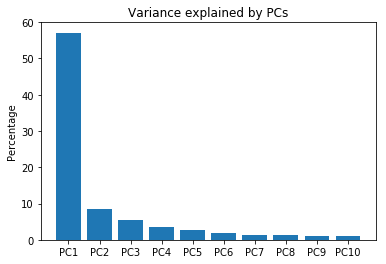

In [25]:
#principal component analysis

from sklearn.decomposition import PCA
n=10 #number of components
pca_data = PCA(n_components=n) 
pca_data.fit(data_scaled) #adjustment of the data to the pca model
x_reduced = pca_data.transform(data_scaled) #reduction of dimensionality of the dataset


#barplot representing the variance explained by PCs 
print(pca_data.explained_variance_ratio_) 
plt.bar(range(n), pca_data.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variance explained by PCs")
plt.ylabel("Percentage")
plt.show()

The results obtain in the pca analysis shows that the first principal component explain over 50% of the data with the other components explaining a lower percentage.

### 'Patient's Vital Status'

[[ 38.07388552 -29.65322331   1.68246465 ... -10.65455294  -1.42559759
   -0.59411291]
 [  4.83347152 -13.28033355  17.36583128 ... -14.28886146  -8.42827183
    5.98117468]
 [-36.19093898 -42.5107557    2.95772564 ... -15.20810827  -5.83530095
   -7.84301892]
 ...
 [103.8038881   -5.06208948  25.20164649 ...  -3.12838182   7.22298395
    0.60735215]
 [ 81.1530596   -4.61619717  -9.41025702 ...  11.80421805  24.29320927
   -0.83953568]
 [-32.77240865  92.28081582  -3.64250242 ...  -0.1640096    9.34527907
   23.37055092]]


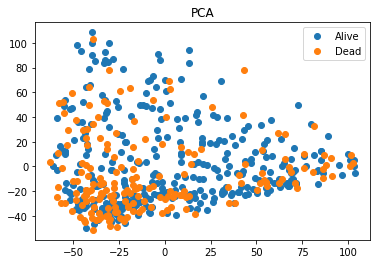

In [91]:
# plot representing the distribuition of the first two principal components for the different values of Patient's Vital Status 

mydata = data_scaled.reset_index(drop=True)
for status in meta_patients.loc[:,'Patient\'s Vital Status'].unique():
    sp = mydata.index[meta_patients.loc[:,'Patient\'s Vital Status']==status]
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=status)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

## 'Patient Smoking History Category'

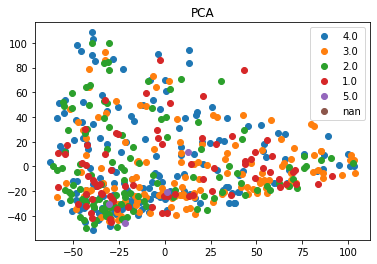

In [100]:
# plot representing the distribuition of the first two principal components for the different values of Patient Smoking History Category


mydata = data_scaled.reset_index(drop=True)
for status in meta_patients.loc[:,'Patient Smoking History Category'].unique():
    sp = mydata.index[meta_patients.loc[:,'Patient Smoking History Category']==status]
    plt.plot(x_reduced[sp,0],x_reduced[sp,1], 'o' , label=status)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

In [26]:
#necessary components to explain 90% of the data

lst_variance=pca_data.explained_variance_ratio_
accum=0
i=0
while accum<0.90 and i<len(lst_variance):
    accum+=lst_variance[i]
    i+=1
print(i)
print(accum)

10
0.8374758789847063


## Task 5 - Clustering

In [30]:
# creating an index for the patient's metadata from 0 to 516 and further removing any na in the "Patient's Vital Status" column
meta_patients.loc[:,"Patient's Vital Status"].index

ind=np.linspace(0,516,517,dtype=int)
mydata_meta=meta_patients.set_index(ind)
mydata_meta=mydata_meta["Patient's Vital Status"].dropna()


Index(['TCGA-05-4244-01', 'TCGA-05-4249-01', 'TCGA-05-4250-01',
       'TCGA-05-4382-01', 'TCGA-05-4384-01', 'TCGA-05-4389-01',
       'TCGA-05-4390-01', 'TCGA-05-4395-01', 'TCGA-05-4396-01',
       'TCGA-05-4397-01',
       ...
       'TCGA-NJ-A4YG-01', 'TCGA-NJ-A4YI-01', 'TCGA-NJ-A4YP-01',
       'TCGA-NJ-A4YQ-01', 'TCGA-NJ-A55A-01', 'TCGA-NJ-A55O-01',
       'TCGA-NJ-A55R-01', 'TCGA-NJ-A7XG-01', 'TCGA-O1-A52J-01',
       'TCGA-S2-AA1A-01'],
      dtype='object', name='Sample ID', length=517)


[[9.00000000e+00 1.50000000e+01 0.00000000e+00 2.00000000e+00]
 [2.30000000e+01 5.17000000e+02 0.00000000e+00 3.00000000e+00]
 [5.00000000e+00 5.18000000e+02 7.95098491e-05 4.00000000e+00]
 ...
 [2.30000000e+02 2.32000000e+02 6.24688591e+03 2.00000000e+00]
 [1.02900000e+03 1.03000000e+03 6.63474605e+03 5.16000000e+02]
 [2.89000000e+02 1.03100000e+03 1.25091980e+04 5.17000000e+02]]


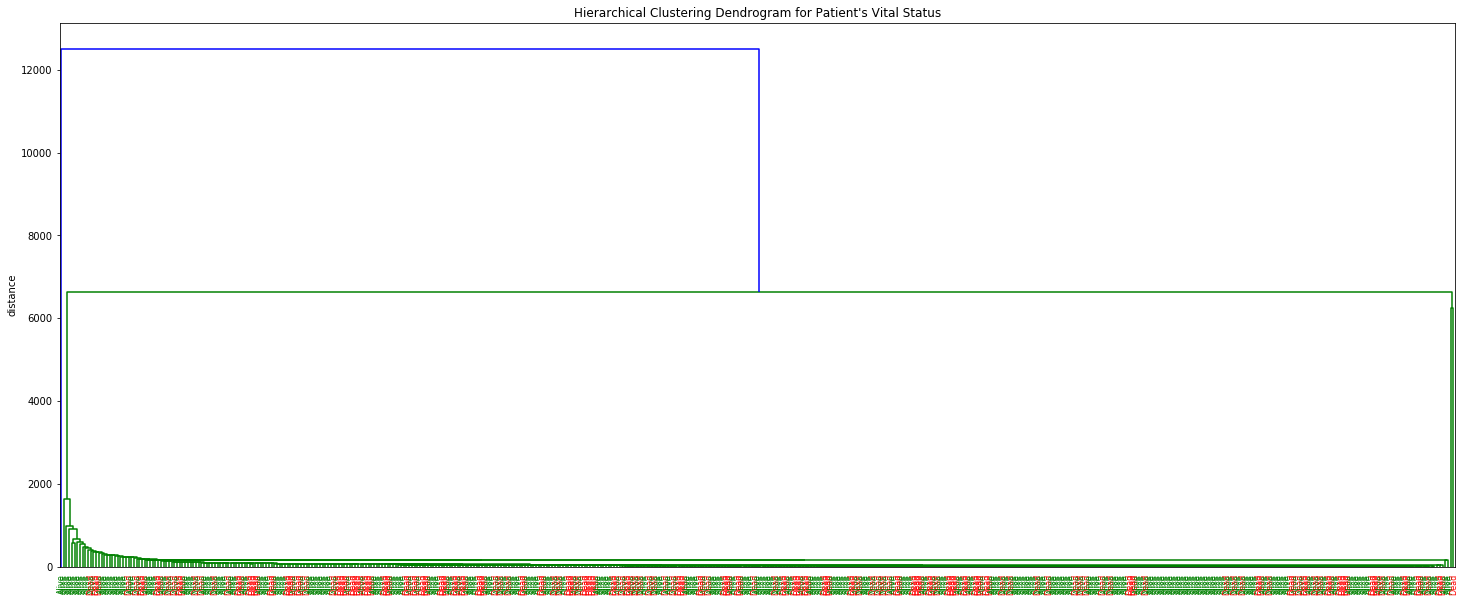

In [32]:
# hierarchical cluter of the data from the Patient's Vital Status with the Manhattan distance and resulting tree 
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled.iloc[mydata_meta.index,:], metric="cityblock")
print(Z)
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(mydata_meta),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title("Hierarchical Clustering Dendrogram for Patient\'s Vital Status")
plt.ylabel('distance')

label_colors = {'Dead': 'r', 'Alive': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

In [33]:
# K-means clustering with k=2

from sklearn.cluster import KMeans

k=2
kmeans_data = KMeans(n_clusters=k, max_iter=1000)
kmeans_data.fit(data_scaled) #adjustment of the data to the clustering model
labels =  kmeans_data.labels_
centroids = kmeans_data.cluster_centers_

pd.crosstab(labels,meta_patients.loc[:,"Patient's Vital Status"], rownames=['clusters'] )


[[-0.03454542 -0.03960329 -0.0379281  ... -0.02323238 -0.02532987
  -0.02322204]
 [ 9.68123475 11.09868578 10.62921913 ...  6.51079427  7.09860858
   6.50789705]]


ValueError: Shape of passed values is (20531, 2), indices imply (517, 2)

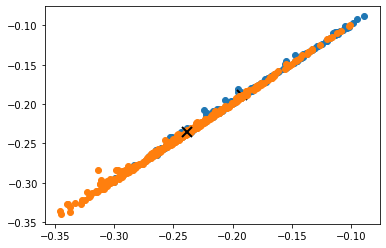

In [78]:
for i in range(k):
    ds = data_scaled.values[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)   
    plt.setp(lines,mew=2.0)   
plt.show()

In [113]:
# creating an index for the patient's metadata from 0 to 516 and further removing any na in the "Patient Smoking History Category" column

ind=np.linspace(0,516,517,dtype=int)
mydata_meta=meta_patients.set_index(ind)
mydata_meta=mydata_meta["Patient Smoking History Category"].dropna()
mydata_meta


0      4.0
1      3.0
2      4.0
3      4.0
4      3.0
      ... 
512    4.0
513    3.0
514    3.0
515    3.0
516    3.0
Name: Patient Smoking History Category, Length: 503, dtype: float64

[[7.20000000e+01 2.85000000e+02 8.27172739e+02 2.00000000e+00]
 [1.42000000e+02 4.03000000e+02 9.15197839e+02 2.00000000e+00]
 [3.90000000e+01 4.63000000e+02 9.31399310e+02 2.00000000e+00]
 ...
 [4.04000000e+02 1.00100000e+03 3.61391987e+03 5.01000000e+02]
 [9.00000000e+00 1.00200000e+03 3.70393870e+03 5.02000000e+02]
 [3.30000000e+02 1.00300000e+03 4.01641895e+03 5.03000000e+02]]


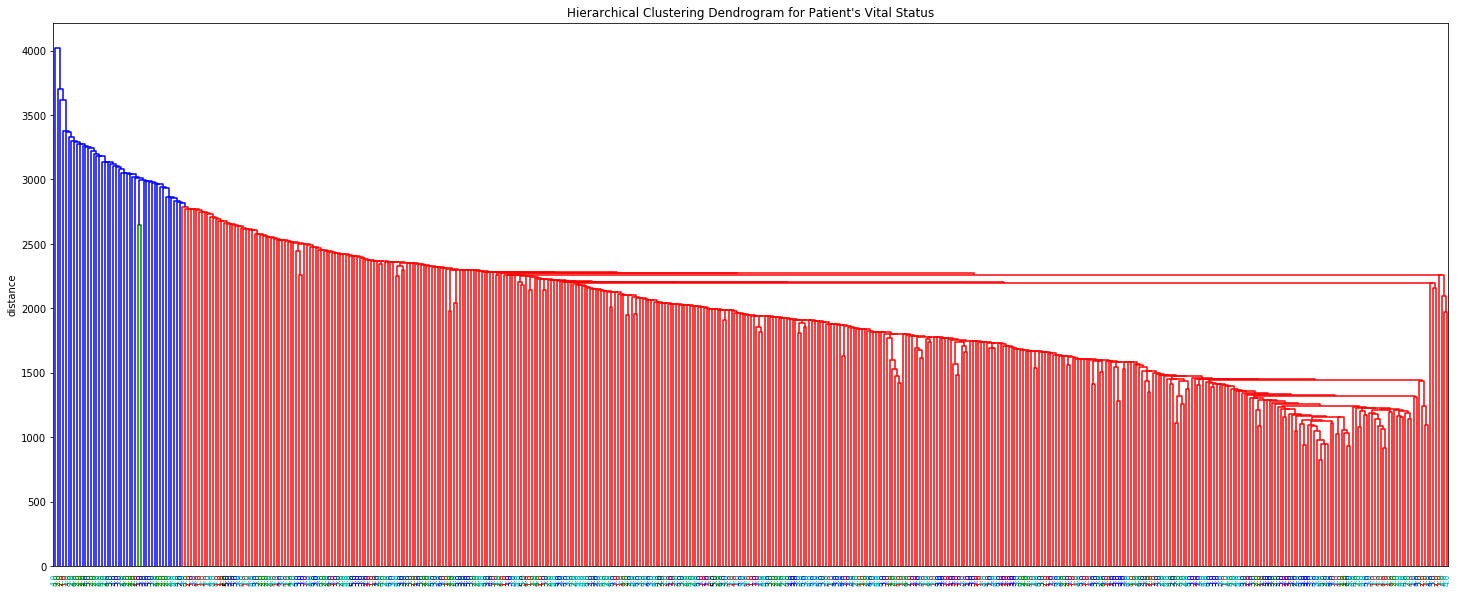

In [117]:
# hierarchical cluter of the data from the Patient Smoking History Category with the Manhattan distance and resulting tree 

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_scaled.iloc[mydata_meta.index,:], metric="cityblock")
print(Z)
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(mydata_meta),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title("Hierarchical Clustering Dendrogram for Patient Smoking History Category")
plt.ylabel('distance')

label_colors = {1.0: 'r', 2.0: 'g', 3.0:'b', 4.0:'c', 5.0: 'k'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[float(lbl.get_text())])

plt.show()

In [121]:
#k-means clustering with k=5
k=5
kmeans_data = KMeans(n_clusters=k, max_iter=1000)
kmeans_data.fit(data_scaled) #adjustment of the data to the clustering model
labels =  kmeans_data.labels_
centroids = kmeans_data.cluster_centers_

pd.crosstab(labels,meta_patients.loc[:,"Patient Smoking History Category"], rownames=['clusters'] )

Patient Smoking History Category,1.0,2.0,3.0,4.0,5.0
clusters,,,,,
0,17,18,14,23,2
1,15,15,29,21,0
2,14,14,38,30,1
3,10,27,17,39,0
4,20,45,37,56,1


# References

    [1] Cancer Genome Atlas Research Network. (2014). Comprehensive molecular profiling of lung adenocarcinoma. Nature, 511(7511), 543.